In [2]:
import sys; sys.path.append('/home/clair/wwa'); from wwa import *
cproj = cartopy.crs.PlateCarree()

# **Local precipitation**

In [15]:
df = pd.read_csv("data/zagora.txt", sep = "\t", index_col = "date", parse_dates = True)

rx2day = df.loc[[m in [6,7,8,9] for m in df.index.month]].rolling(2).sum().resample("AS-JUL").max()
rx4day = df.loc[[m in [6,7,8,9] for m in df.index.month]].rolling(4).sum().resample("AS-JUL").max()

In [20]:
rx2day, rx4day = [ts.set_index(ts.index.year) for ts in [rx2day, rx4day]]

In [26]:
rx2day.round(1).to_csv("data/zagora_rx2day.csv", sep = " ")

In [73]:
# check daily data match
mz = xr.open_dataset("data/iera5_tp_daily_eu_extended_18-27E_30-36N_20-23E_32-33N_n_5lan.nc").tp.dropna("time", "any")
cb = xr.open_dataset("data/era5-libya-daily.nc").tp

# check annual data match
cb_rx1day = cb.resample(time = "AS-JUL").max()
cb_rx1day = cb_rx1day.assign_coords(time = cb_rx1day.time.dt.year)
mz_1day = pd.read_csv("data/annual_Ts.txt", sep = " +", engine = "python", index_col = "year")

<AxesSubplot: xlabel='year', ylabel='Precipitation [mm/dy]'>

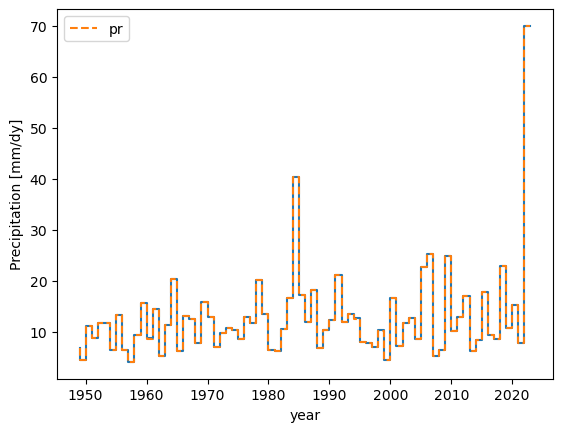

In [75]:
cb_rx1day.plot(drawstyle = "steps")
mz_1day.plot(drawstyle = "steps", ax = plt.gca(), ls = "--")

In [30]:
zz = xr.open_dataset("data/era5-libya-daily.nc").tp.resample(time = "AS-JUL").max()
zz.assign_coords(time = zz.time.dt.year).rename(time = "year").to_dataframe().to_csv("era5_lsm_libya.csv")

In [49]:
pd.read_csv("data/libya_rx1day_era5.csv", index_col = "year").to_csv("data/libya-rx1day-upload.txt", sep = " ")

# **Maps of return times**

In [10]:
nd = 2

era5 = xr.open_dataset("data/greece_rx"+str(nd)+"day_era5.nc").tp.isel(time = 0)
df = pd.read_csv("res_sr-flattened_rx"+str(nd)+"day_era5.csv", index_col = 0)
rp_map = xr.DataArray(data = np.array(df.loc["rp"]).reshape(era5.shape), dims = era5.dims, coords = era5.coords)

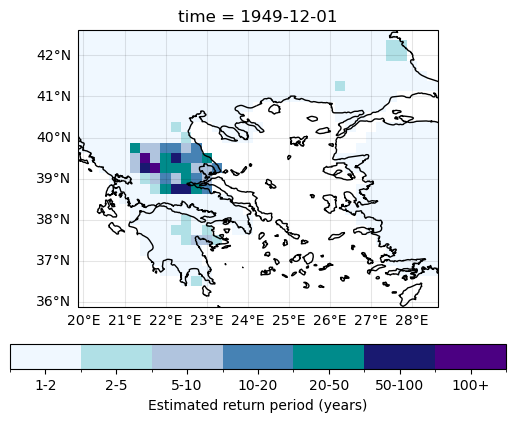

In [12]:
rp_disc = xr.apply_ufunc(np.digitize, rp_map, kwargs={'bins': [0,2,5,10,20,50,100,np.inf]}).where(~np.isnan(rp_map))
rp_cmap = matplotlib.colors.ListedColormap(['aliceblue', 'powderblue', 'lightsteelblue', 'steelblue','darkcyan', "midnightblue", "indigo"])

cbar = rp_disc.plot(cmap = rp_cmap, norm = matplotlib.colors.BoundaryNorm(np.arange(0.5,8.5,1), rp_cmap.N), add_colorbar = False, 
                    subplot_kws = {"projection" : cproj})
ax = plt.gca()
ax.coastlines()
ax.gridlines(color = "k", alpha = 0.1, draw_labels = ["bottom", "left"], xlocs = range(19,29))

cbar = plt.colorbar(cbar, ax = ax, location = "bottom", ticks = list(range(1,8)), label = "Estimated return period (years)", pad = 0.1)
cbar.ax.set_xticklabels(["1-2", "2-5", "5-10", "10-20", "20-50", "50-100", "100+"])

plt.savefig("fig/return-period-map_rx"+str(nd)+"day_era5.png")

In [5]:
era5 = xr.open_dataset("data/adaptor.mars.internal-1694791791.395632-3242-13-7b6be3eb-329d-47b2-a77a-36269137b770.nc").tp

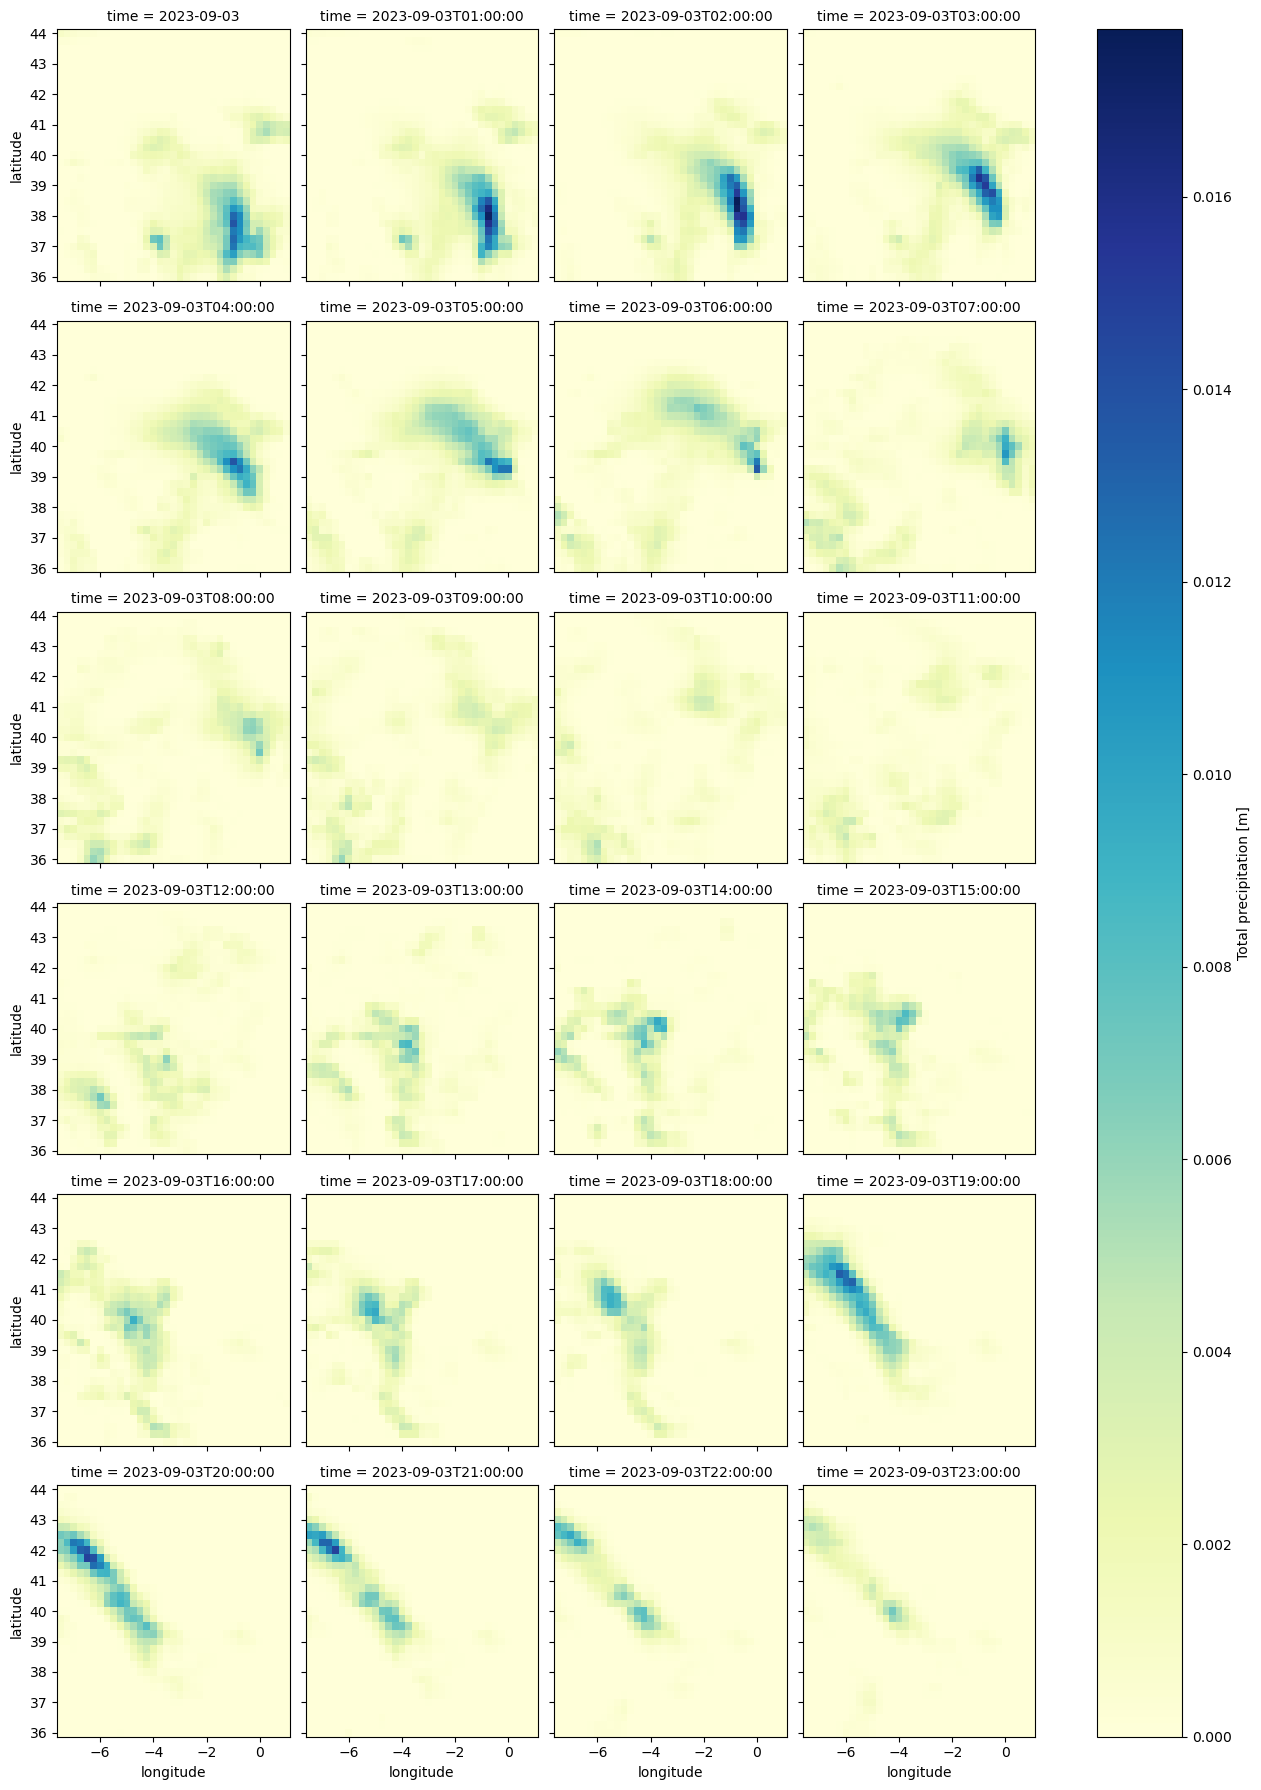

In [8]:
era5.sel(time = "2023-09-03").plot(col = "time", cmap = "YlGnBu", col_wrap = 4)